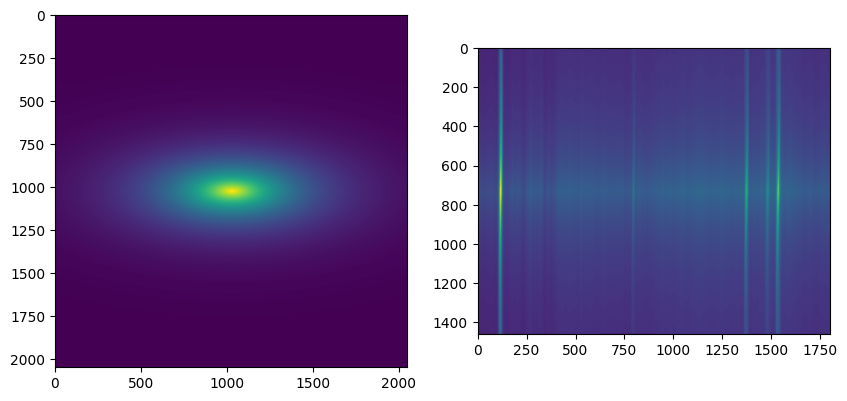

In [19]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
u.imperial.enable()


galaxSpect = 'Galax_Spect.fits'
#pyfits.info(file_flux)
hdu = pyfits.open(galaxSpect)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header


def imgEnd(header):
    return header["CRVAL1"]+(header["NAXIS1"]-2)*header["CDELT1"]
    
#xIMG = np.arange(headerIMG["CRVAL1"], imgEnd(headerIMG) + headerIMG["CDELT1"], headerIMG["CDELT1"])

#yIMG = lambda x: IMG[x]


fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [20]:
headerIMG
headerLSS


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    1 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  1.1745426707708E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

In [21]:
# define physical absolute axis
xIMG = headerIMG["CRVAL1"] + (np.arange(headerIMG["NAXIS1"]) - (headerIMG["CRPIX1"] - 1)) * headerIMG["CDELT1"]
yIMG = headerIMG["CRVAL2"] + (np.arange(headerIMG["NAXIS2"]) - (headerIMG["CRPIX2"] - 1)) * headerIMG["CDELT2"]

x_DEG_IMG = xIMG * u.deg
y_DEG_IMG = yIMG * u.deg

xLSS = headerLSS["CRVAL1"] + (np.arange(headerLSS["NAXIS1"]) - (headerLSS["CRPIX1"] - 1)) * headerLSS["CDELT1"]
yLSS = headerLSS["CRVAL2"] + (np.arange(headerLSS["NAXIS2"]) - (headerLSS["CRPIX2"] - 1)) * headerLSS["CDELT2"]

x_M_LSS = xLSS * u.m
y_ARCSEC_LSS = yLSS * u.arcsec

# define physical relative IMAGE axis with proper units
xIMGStart = headerIMG["CRVAL1"] * u.deg
yIMGStart = headerIMG["CRVAL2"] * u.deg

x_DEG_IMG_rel = x_DEG_IMG - xIMGStart
y_DEG_IMG_rel = y_DEG_IMG - yIMGStart

x_ARCSEC_IMG_rel = x_DEG_IMG_rel.to(u.arcsec)
y_ARCSEC_IMG_rel = y_DEG_IMG_rel.to(u.arcsec)

# define physical (relative) LSS axis with proper units
x_NM_LSS = x_M_LSS.to(u.nm)

yLSSStart = headerLSS["CRVAL2"] * u.arcsec

y_ARCSEC_LSS_rel = y_ARCSEC_LSS - yLSSStart
y_DEG_LSS = y_ARCSEC_LSS.to(u.deg)

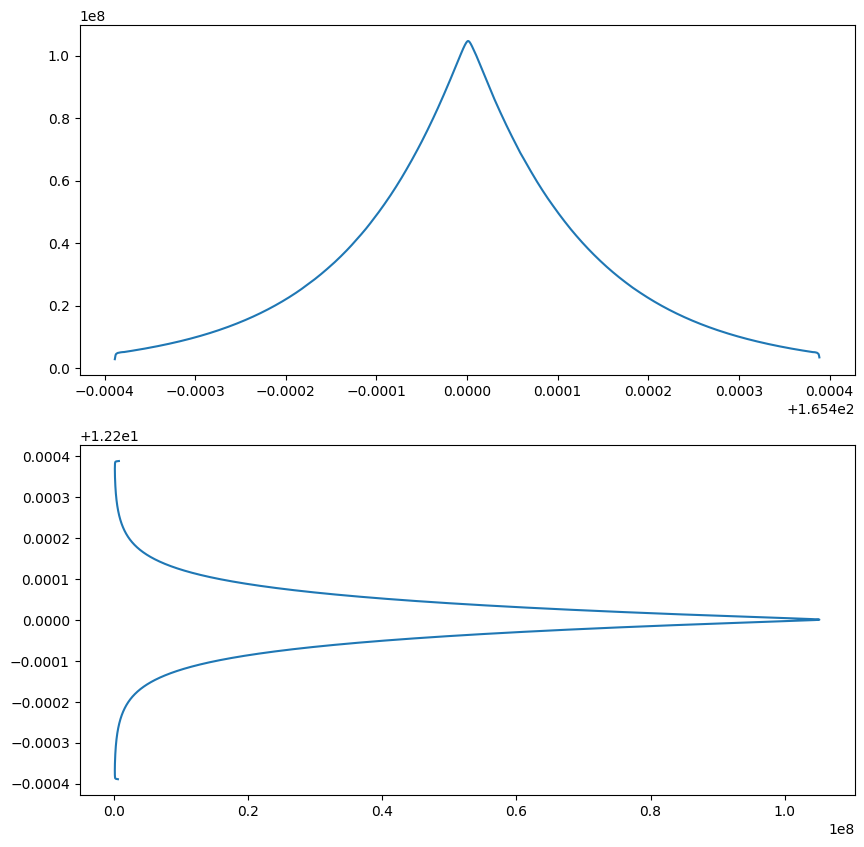

In [22]:
#X and Y cut IMG
fix, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(x_DEG_IMG, IMG[1024, :])
axis[1].plot(IMG[:, 1024], y_DEG_IMG)

plt.show()

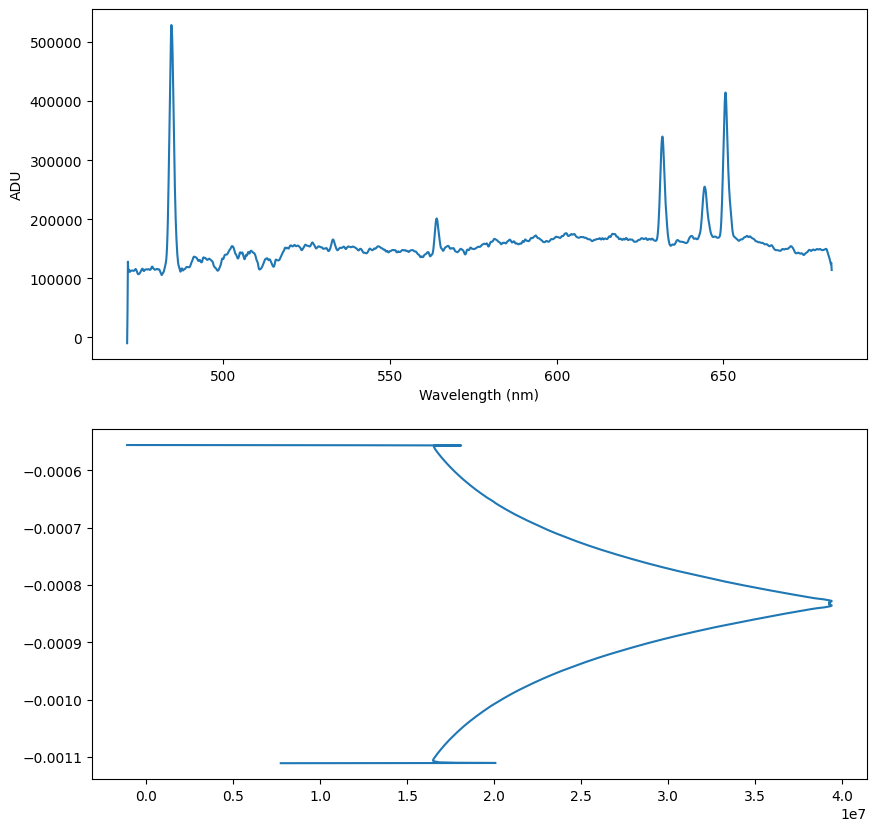

In [23]:
#LSS x and y cut
fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(x_NM_LSS, LSS[900, :])
axis[0].set_xlabel('Wavelength (nm)')
axis[0].set_ylabel('ADU')

flux = np.nansum(LSS[:, 600:800], axis=1)
axis[1].plot(flux, y_DEG_LSS)

plt.show()

Corrected Wavelengths: 
 1:	373.0769nm 
 2:	485.6154nm 
 3:	500.1538nm


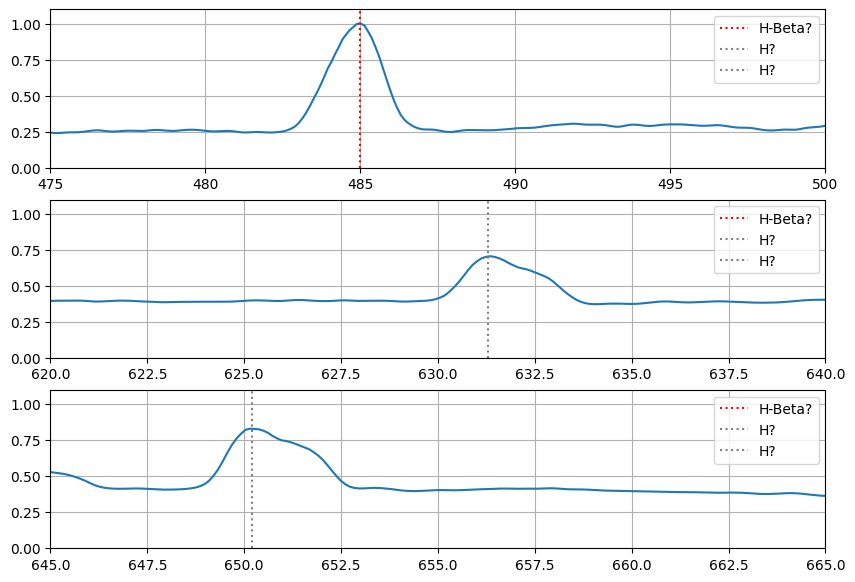

In [ ]:
#Doppler Correction and Gauss-Fit

Z = 0.3


#z = fobs/femit - 1 => femit = fobs/(1+z)
def redshiftCorrection(wavelength):
    return(wavelength / (1+Z))


#Approx redshifted emmision-wavelengths in nm:
line1 = 485
line2 = 631.3
line3 = 650.2

fig, ax = plt.subplots(3, 1, figsize=(10, 7))
ax[0].plot(x_NM_LSS.value, LSS[100, :]/max(LSS[100, :]))
ax[0].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[0].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[0].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[0].set_xlim(475, 500)
ax[0].set_ylim(0, 1.1)
ax[0].grid()
ax[0].legend()

ax[1].plot(x_NM_LSS.value, LSS[1400, :]/max(LSS[1400, :]))
ax[1].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[1].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[1].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[1].set_xlim(620, 640)
ax[1].set_ylim(0, 1.1)
ax[1].grid()
ax[1].legend()

ax[2].plot(x_NM_LSS.value, LSS[1400, :]/max(LSS[1400, :]))
ax[2].vlines(line1, 0, 1.1, linestyles=':', colors='r', label='?')
ax[2].vlines(line2, 0, 1.1, linestyles=':', colors='gray', label='?')
ax[2].vlines(line3, 0, 1.1, linestyles=':', colors='grey', label='?')
#ax.set_xlim(min(x_NM_LSS.value), max(x_NM_LSS.value))
ax[2].set_xlim(645, 665)
ax[2].set_ylim(0, 1.1)
ax[2].grid()
ax[2].legend()


corrLine1 = redshiftCorrection(line1)
corrLine2 = redshiftCorrection(line2)
corrLine3 = redshiftCorrection(line3)

print(f'Corrected Wavelengths: \n 1:\t{corrLine1:.4f}nm \n 2:\t{corrLine2:.4f}nm \n 3:\t{corrLine3:.4f}nm')


Closes guesses with NIST-ASD so far:

Ti I 	373.0770 nm 
Fe II 	485.6152 nm 
Fe II 	500.1557 nm 



NameError: name 'xDEGIMG' is not defined

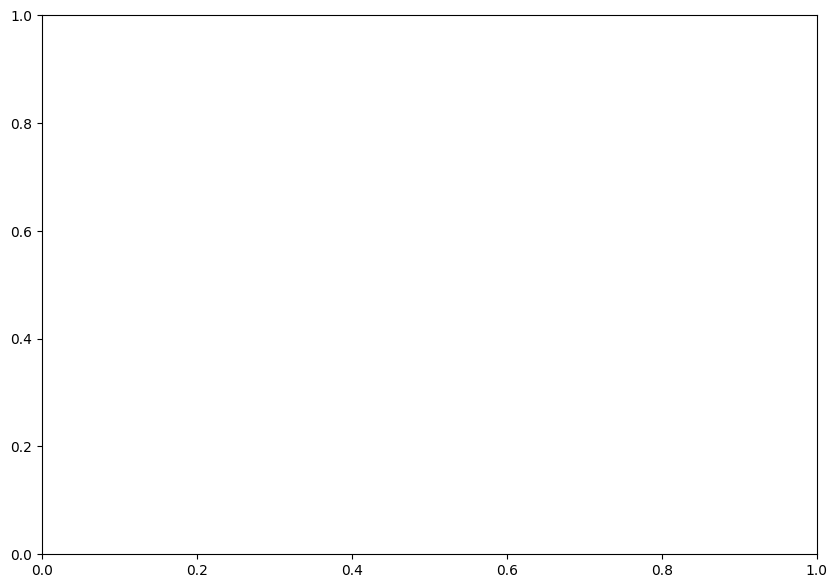

In [ ]:
#Rot.-Curve (wrong slices so far)
sliceSize = 150

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
      
for i in range(len(y_DEG_LSS)):
    ax.plot(IMG[i:sliceSize])

ax.vlines(165.4, 0, 1e7, linestyles='-', colors='gray')

ax.set_xlabel='deg'
ax.set_ylabel='deg'
